In [1]:
!pip install pmdarima
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 5.3 MB/s 
     |████████████████████████████████| 9.8 MB 38.3 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 525 kB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [2]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima
import datetime
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [3]:
import yfinance as yahooFinance

# Here We are getting Facebook financial information
# We need to pass META as argument for that
GetFacebookInformation = yahooFinance.Ticker("META")

startDate = datetime.datetime(2012,8,27)
endDate = datetime.datetime(2020,2,1)


# Loading the dataset into df variable
df = GetFacebookInformation.history(start=startDate, end=endDate)


In [4]:
# Viewing the first five data point from the dataset  
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2012-08-27,19.49,19.530001,19.100000,19.150000,20704000,0,0
2012-08-28,19.10,19.379999,18.950001,19.340000,25417000,0,0
2012-08-29,19.32,19.379999,19.070000,19.100000,16124700,0,0
2012-08-30,19.27,19.450001,19.059999,19.090000,30647500,0,0
2012-08-31,18.68,18.700001,18.030001,18.059999,58764200,0,0


In [5]:
df.shape

(1869, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1869 entries, 2012-08-27 to 2020-01-31
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1869 non-null   float64
 1   High          1869 non-null   float64
 2   Low           1869 non-null   float64
 3   Close         1869 non-null   float64
 4   Volume        1869 non-null   int64  
 5   Dividends     1869 non-null   int64  
 6   Stock Splits  1869 non-null   int64  
dtypes: float64(4), int64(3)
memory usage: 116.8 KB


In [7]:
df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,1869.000000,1869.000000,1869.000000,1869.000000,1.869000e+03,1869.0,1869.0
mean,113.801043,114.989738,112.561755,113.829914,3.261246e+07,0.0,0.0
std,56.357063,56.810403,55.883546,56.389284,2.682909e+07,0.0,0.0
min,18.080000,18.270000,17.549999,17.730000,5.913100e+06,0.0,0.0
25%,69.690002,71.000000,68.610001,69.400002,1.615170e+07,0.0,0.0
50%,114.699997,116.169998,113.669998,115.050003,2.383650e+07,0.0,0.0
75%,167.860001,169.360001,166.210007,168.080002,3.988760e+07,0.0,0.0
max,222.570007,224.199997,221.279999,223.229996,3.654579e+08,0.0,0.0


In [8]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [9]:
missing_table=missing_values_table(df)
missing_table

Your selected dataframe has 7 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


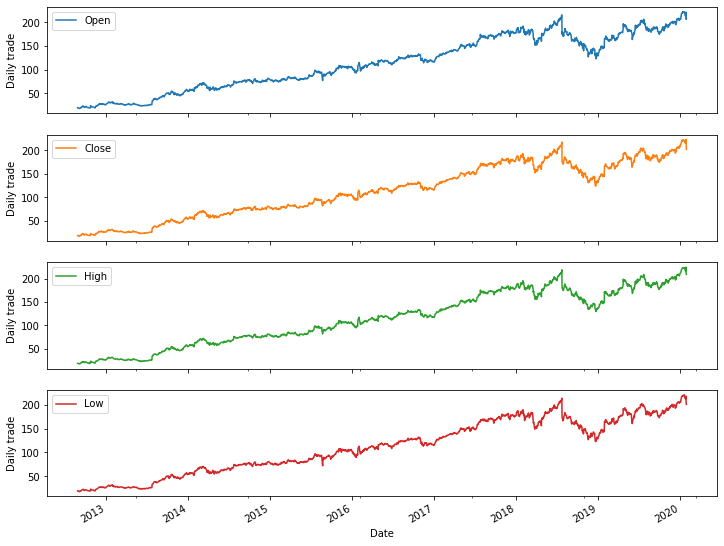

In [10]:
cols_plot = ['Open', 'Close', 'High','Low']
axes = df[cols_plot].plot(figsize=(12, 10), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

In [11]:
df.isnull().sum()

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

In [12]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')

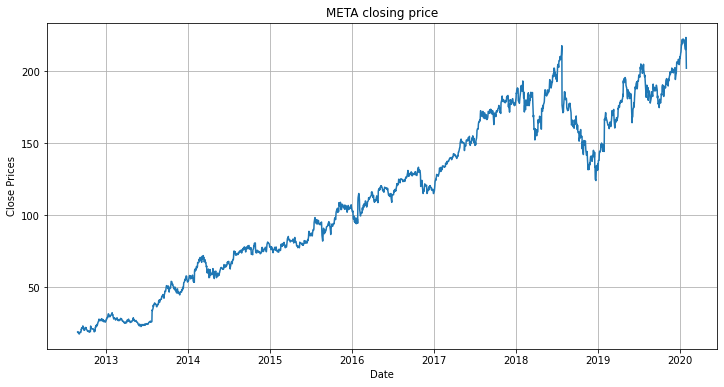

In [13]:
#plot close price
plt.figure(figsize=(12,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Close Prices')
plt.plot(df['Close'])
plt.title('META closing price')
plt.show()

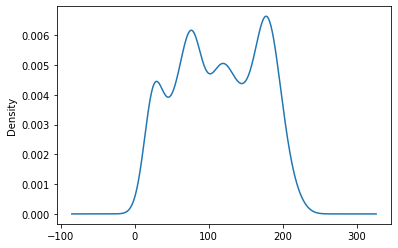

In [14]:
#Distribution of the dataset
df_close = df['Close']
df_close.plot(kind='kde')

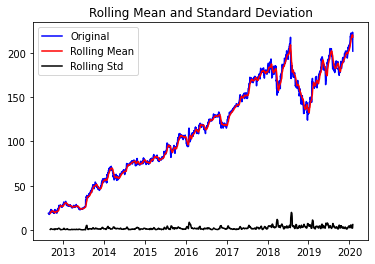

Results of dickey fuller test
Test Statistics                  -1.007838
p-value                           0.750395
No. of lags used                  0.000000
Number of observations used    1868.000000
critical value (1%)              -3.433856
critical value (5%)              -2.863088
critical value (10%)             -2.567594
dtype: float64


In [15]:
#Test for staionarity
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
test_stationarity(df_close)

<Figure size 432x288 with 0 Axes>

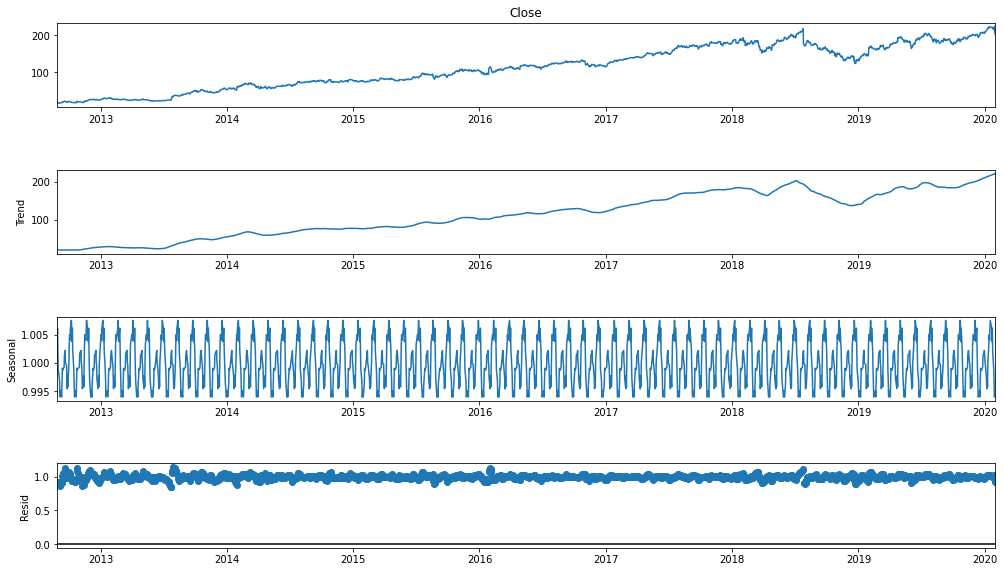

In [16]:
#To separate the trend and the seasonality from a time series, 
# we can decompose the series using the following code.
result = seasonal_decompose(df_close, model='multiplicative',extrapolate_trend='freq', period=30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

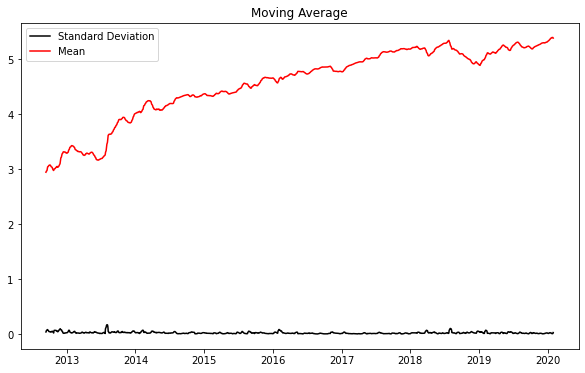

In [17]:
#if not stationary then eliminate trend
#Eliminate trend
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
df_log = np.log(df_close)
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()

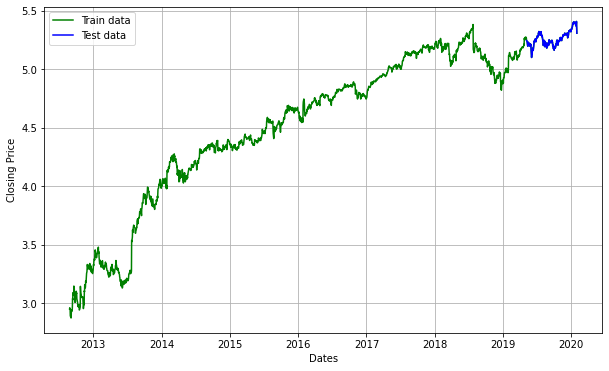

In [18]:
# train test split
train_data, test_data = df_log[3:int(len(df_log)*0.9)], df_log[int(len(df_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Price')
plt.plot(df_log, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-8062.338, Time=0.19 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-8060.818, Time=0.41 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-8060.810, Time=0.32 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-8057.658, Time=0.12 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-8058.814, Time=0.93 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 1.989 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1679
Model:               SARIMAX(0, 1, 0)   Log Likelihood                4033.169
Date:                Tue, 06 Sep 2022   AIC                          -8062.338
Time:                        16:38:13   BIC                          -8051.487
Sample:                             0   HQIC                         -8058.318
                               - 1679                                  

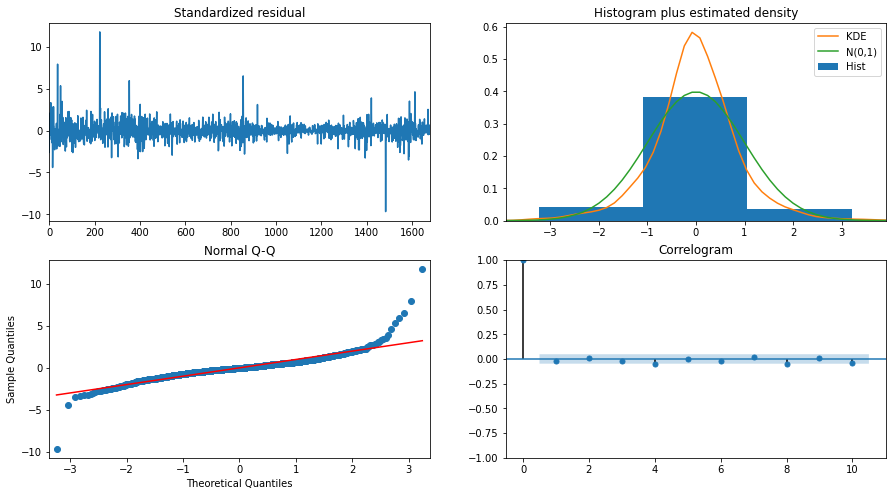

In [19]:
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

In [20]:
#Modeling
# Building the Model
model = ARIMA(train_data, order=(1,1,2))  
fitted = model.fit()  
print(fitted.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1679
Model:                 ARIMA(1, 1, 2)   Log Likelihood                4030.011
Date:                Tue, 06 Sep 2022   AIC                          -8052.023
Time:                        16:38:39   BIC                          -8030.322
Sample:                             0   HQIC                         -8043.984
                               - 1679                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0845      1.154      0.073      0.942      -2.177       2.346
ma.L1         -0.0987      1.156     -0.085      0.932      -2.365       2.167
ma.L2          0.0172      0.025      0.678      0.4

In [21]:
# Model Forecasting
fc = fitted.forecast(187, alpha=0.05)  # with 95% confidence interval

# Make as pandas series
fc_series = fc.values
fc_series = pd.Series(fc_series, index=test_data.index)


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,


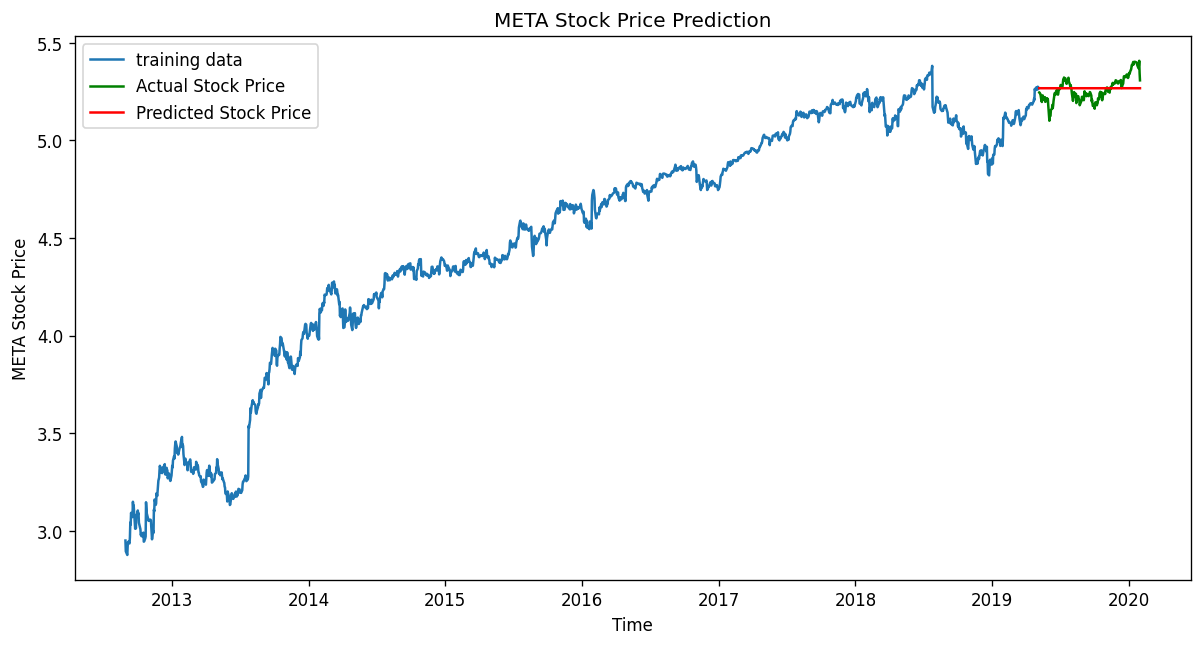

In [22]:
# Plot
plt.figure(figsize=(12,6), dpi=120)
plt.plot(train_data, label='training data')
plt.plot(test_data, color = 'green', label='Actual Stock Price')
plt.plot(fc_series, color = 'red',label='Predicted Stock Price')
plt.title('META Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('META Stock Price')
plt.legend(loc='top left', fontsize=10)
plt.show()

In [23]:
# reporting the performance of the model
mse = mean_squared_error(test_data, fc)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data, fc)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data, fc))
print('RMSE: '+str(rmse))

MSE: 0.003915873559487395
MAE: 0.05117451902661638
RMSE: 0.062576941116416
